## Data Cleaning Phase

In [16]:
import pandas as pd
import numpy as np
import re, string
import torch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/dell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/dell/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df = pd.read_csv("../data/IMDB_Dataset.csv")
print("Dataset shape:", df.shape)
print(df.head())
print(df['sentiment'].value_counts())

Dataset shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_review"] = df["review"].apply(clean_text)

In [19]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (50000, 3)


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [20]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["clean_review"].apply(word_tokenize)
print("===============================================")
print(df["tokens"].head())
print("===============================================")
print("Dataset shape:", df.shape)
print("===============================================")
df.head()

0    [one, of, the, other, reviewers, has, mentione...
1    [a, wonderful, little, production, the, filmin...
2    [i, thought, this, was, a, wonderful, way, to,...
3    [basically, theres, a, family, where, a, littl...
4    [petter, matteis, love, in, the, time, of, mon...
Name: tokens, dtype: object
Dataset shape: (50000, 4)


,review,sentiment,clean_review,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


In [21]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["sentiment"], random_state=42)
print("Train size:", len(train_df))
print("Test size:", len(test_df))

Train size: 40000
Test size: 10000


In [22]:
label_map = {"positive": 1, "negative": 0}
train_df["label"] = train_df["sentiment"].map(label_map)
test_df["label"] = test_df["sentiment"].map(label_map)

In [23]:
train_df.to_csv("../data/train_clean.csv", index=False)
test_df.to_csv("../data/test_clean.csv", index=False)

In [24]:
print("Average tokens per review:", df['tokens'].apply(len).mean())

Average tokens per review: 226.33288


In [25]:
train_df.to_csv("../data/train_clean.csv", index=False)
test_df.to_csv("../data/test_clean.csv", index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


## Phase 2 EDA

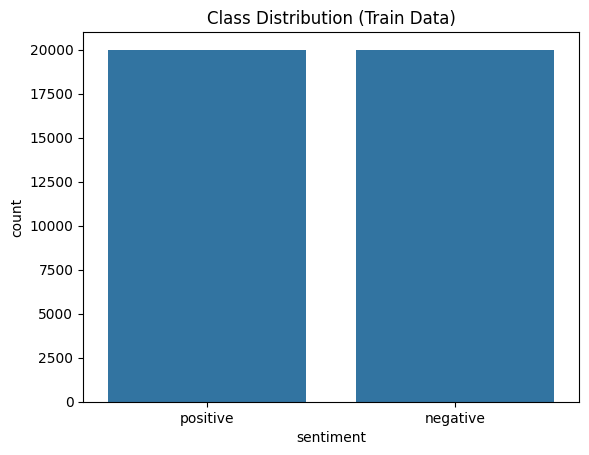

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_df, x="sentiment")
plt.title("Class Distribution (Train Data)")
plt.show()

Average tokens per review: 226.555075


<Axes: >

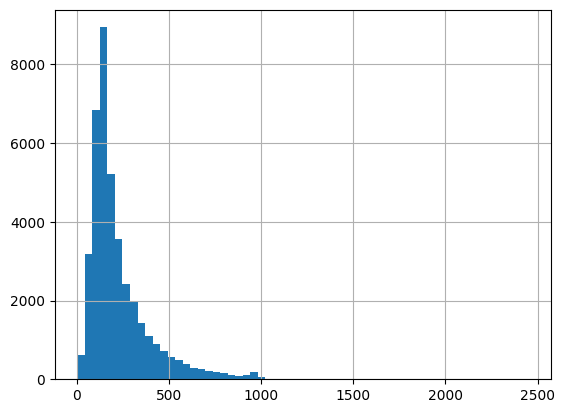

In [27]:
train_df["length"] = train_df["tokens"].apply(len)
print("Average tokens per review:", train_df["length"].mean())
train_df["length"].hist(bins=60)

In [28]:
max_len_95 = np.percentile(train_df["length"], 95)
print("95th percentile review length:", max_len_95)

95th percentile review length: 578.0


In [29]:
for i in range(3):
    print(f"Review {i+1}:")
    print(train_df.iloc[i]['tokens'])
    print("Label:", train_df.iloc[i]['label'])
    print("-" * 60)

Review 1:
['i', 'caught', 'this', 'little', 'gem', 'totally', 'by', 'accident', 'back', 'in', '1980', 'or', '81', 'i', 'was', 'at', 'a', 'revival', 'theatre', 'to', 'see', 'two', 'old', 'silly', 'scifi', 'movies', 'the', 'theatre', 'was', 'packed', 'full', 'and', 'with', 'no', 'warning', 'they', 'showed', 'a', 'bunch', 'of', 'scifi', 'short', 'spoofs', 'to', 'get', 'us', 'in', 'the', 'mood', 'most', 'were', 'somewhat', 'amusing', 'but', 'this', 'came', 'on', 'and', 'within', 'seconds', 'the', 'audience', 'was', 'in', 'hysterics', 'the', 'biggest', 'laugh', 'came', 'when', 'they', 'showed', 'princess', 'laia', 'having', 'huge', 'cinnamon', 'buns', 'instead', 'of', 'hair', 'on', 'her', 'head', 'she', 'looks', 'at', 'the', 'camera', 'gives', 'a', 'grim', 'smile', 'and', 'nods', 'that', 'made', 'it', 'even', 'funnier', 'you', 'got', 'ta', 'see', 'chewabacca', 'played', 'by', 'what', 'looks', 'like', 'a', 'muppet', 'it', 'was', 'extremely', 'silly', 'and', 'stupidbut', 'i', 'couldnt', 'stop

In [30]:
from collections import Counter
all_tokens = [token for tokens in train_df["tokens"] for token in tokens]
vocab = Counter(all_tokens)
print("Total unique tokens:", len(vocab))
print("Most common 10 tokens:", vocab.most_common(10))

Total unique tokens: 192605
Most common 10 tokens: [('the', 521194), ('and', 255750), ('a', 255688), ('of', 230675), ('to', 213452), ('is', 167881), ('in', 146677), ('it', 121237), ('i', 117004), ('this', 116802)]
